# Aim: To forecast the Bank Credit values from March 2020 to August 2020 by using Time Series Analysis through ARIMA model.
## To prove the effects of COVID-19 pandemic on the Credit amounts deployed from the bank for the development of different sectors in India.

## Methodology:
    1. Importing the required packages
    2. Importing the dataset.
    3. Parsing and Indexing the dataset.
    4. Log Transformation of the Data.
    5. Looking for the Stationarity of the data by rolling statistics and Dicky-fuller test methods.
    6. Defining AR (p), I (d), MA(q) values.
    7. Creating an ARIMA estimator and time series model. 
    8. Predicting the values using the estimator. 
    9. Forecasting the data for the required months.
    10.Importing the actual credit amount released during the pandemic months to compare.
    11.Looking at the difference in the values to conclude.
    
    Visualization is used to have a better understanding on the processes as and when required.

In [39]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=10,6

# Stationarity check
from statsmodels.tsa.stattools import adfuller

# Calculating ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

# Calculation Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [38]:
#Importing the dataset
dataset= pd.read_csv("E:\\Ani\\self\\Trinity\\NLP_assignment\\Month_credit_2016-2020.csv")

In [40]:
# parse string to datetime type.
dataset["Month"]= pd.to_datetime(dataset["Month"], infer_datetime_format=True )
indexed_dataset= dataset.set_index(["Month"])
print(indexed_dataset.head(), indexed_dataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2016-01-30 to 2020-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Credit  50 non-null     int64
dtypes: int64(1)
memory usage: 800.0 bytes
             Credit
Month              
2016-01-30  6498328
2016-02-29  6577918
2016-03-30  6649972
2016-04-30  6645004
2016-05-30  6660337 None


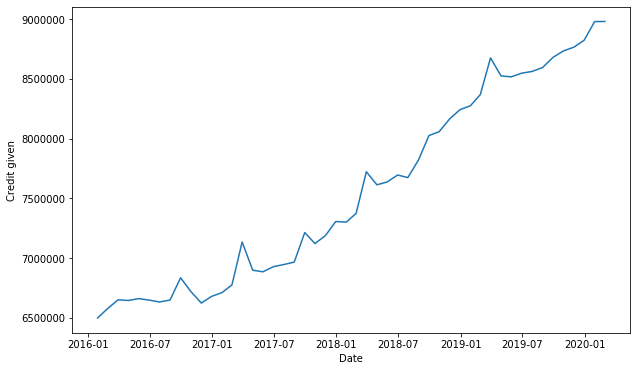

In [41]:
# Visualizing Indexded data
plt.xlabel("Date")
plt.ylabel("Credit given")
plt.plot(indexed_dataset)

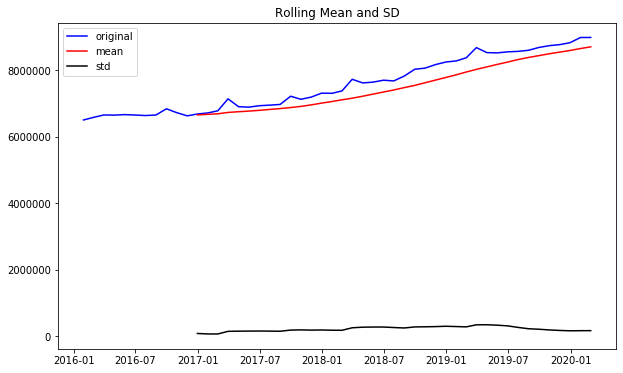

Test statistic              0.400959
p-value                     0.981531
#Lags used                  6.000000
No of observations used    43.000000
Critical value(1%)         -3.592504
Critical value(5%)         -2.931550
Critical value(10%)        -2.604066
dtype: float64


In [42]:
# Analysing the stationary nature of the data using 
# rolling method(for visualization) and Dickey-fuller test (for statistical evaluation).

def test_stationary(timeseries):
        
    #Determinig roling stats
    moving_average= timeseries.rolling(window=12 ).mean()
    moving_std= timeseries.rolling(window=12 ).std()


    original= plt.plot(timeseries, color= "blue", label= "original")
    mean = plt.plot(moving_average, color= "red", label= "mean")
    std = plt.plot(moving_std, color= "black", label= "std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and SD")
    plt.show(block=False)


    #Dickey- fuller test

    dftest= adfuller(timeseries["Credit"], autolag="AIC")

    dfoutput= pd.Series(dftest[0:4], index= ["Test statistic", "p-value", "#Lags used", "No of observations used"])
    for key, value in dftest[4].items():
        dfoutput["Critical value(%s)" %key] = value


    print(dfoutput)
test_stationary(indexed_dataset)

## Data has an upward trend and mean and standard deviation is also changing constantly and p-value is also very high which proves that the data is not stationary. We need to fix the non-stationary nature of the data before we apply ARIMA model.

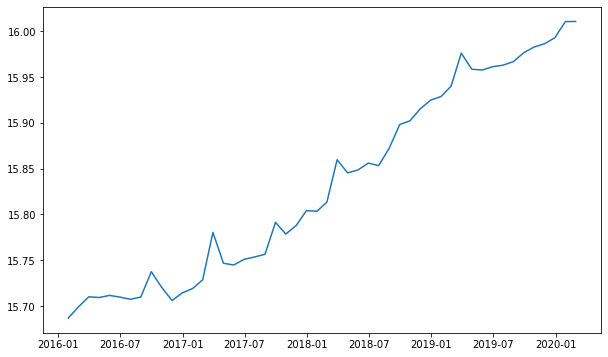

In [7]:
# Data Transformation- Log Transformation
indexed_dataset_logscale = np.log(indexed_dataset)
plt.plot(indexed_dataset_logscale)

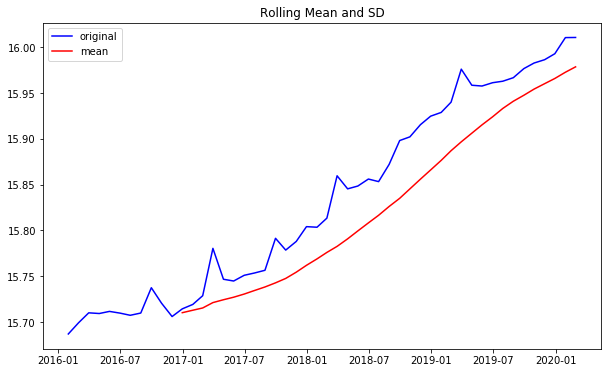

Test statistic              0.148204
p-value                     0.969202
#Lags used                  6.000000
No of observations used    43.000000
Critical value(1%)         -3.592504
Critical value(5%)         -2.931550
Critical value(10%)        -2.604066
dtype: float64


In [8]:
# Rolling method(for visualization) and Dickey-fuller test (for statistical evaluation).

def test_stationary(timeseries):
        
    #Determinig roling stats
    moving_average= timeseries.rolling(window=12 ).mean()
    moving_std= timeseries.rolling(window=12 ).std()


    original= plt.plot(timeseries, color= "blue", label= "original")
    mean = plt.plot(moving_average, color= "red", label= "mean")
    plt.legend(loc="best")
    plt.title("Rolling Mean and SD")
    plt.show(block=False)


    #Dickey- fuller test

    dftest= adfuller(timeseries["Credit"], autolag="AIC")

    dfoutput= pd.Series(dftest[0:4], index= ["Test statistic", "p-value", "#Lags used", "No of observations used"])
    for key, value in dftest[4].items():
        dfoutput["Critical value(%s)" %key] = value


    print(dfoutput)
test_stationary(indexed_dataset_logscale)

In [ ]:
# Add for log data

In [9]:
moving_average= indexed_dataset_logscale.rolling(window=12 ).mean()
moving_std= indexed_dataset_logscale.rolling(window=12 ).std()

# negating moving average from log transformed data
data_log_minus_MA = indexed_dataset_logscale-moving_average
data_log_minus_MA.head()

# removal of "Nan" from dataset
data_log_minus_MA.dropna(inplace= True)
data_log_minus_MA.head(10)

,Credit
Month,
2016-12-30,0.004183
2017-01-30,0.006343
2017-02-28,0.013377
2017-03-30,0.059169
2017-04-30,0.022349
2017-05-30,0.017662
2017-06-30,0.020466
2017-07-30,0.019108
2017-08-30,0.018201


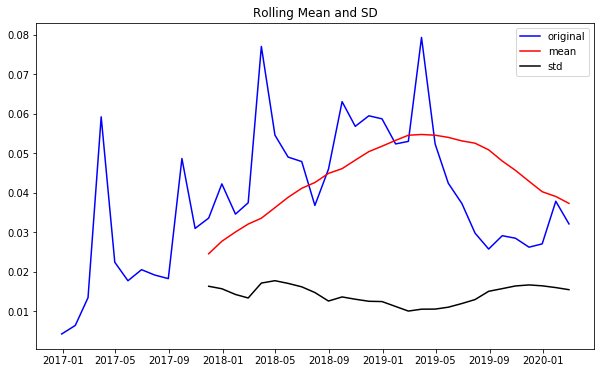

Test statistic             -2.077661
p-value                     0.253591
#Lags used                  6.000000
No of observations used    32.000000
Critical value(1%)         -3.653520
Critical value(5%)         -2.957219
Critical value(10%)        -2.617588
dtype: float64


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
        
    #Determinig roling stats
    moving_average= timeseries.rolling(window=12 ).mean()
    moving_std= timeseries.rolling(window=12 ).std()


    original= plt.plot(timeseries, color= "blue", label= "original")
    mean = plt.plot(moving_average, color= "red", label= "mean")
    std = plt.plot(moving_std, color= "black", label= "std")
    plt.legend(loc="best")
    plt.title("Rolling Mean and SD")
    plt.show(block=False)


    #Dickey- fuller test

    dftest= adfuller(timeseries["Credit"], autolag="AIC")

    dfoutput= pd.Series(dftest[0:4], index= ["Test statistic", "p-value", "#Lags used", "No of observations used"])
    for key, value in dftest[4].items():
        dfoutput["Critical value(%s)" %key] = value


    print(dfoutput)
test_stationary(data_log_minus_MA)


#### Comparing the moving average(above data) with exponential Decay Weighted Average (below data) to see whcih will give us the better p-value. 

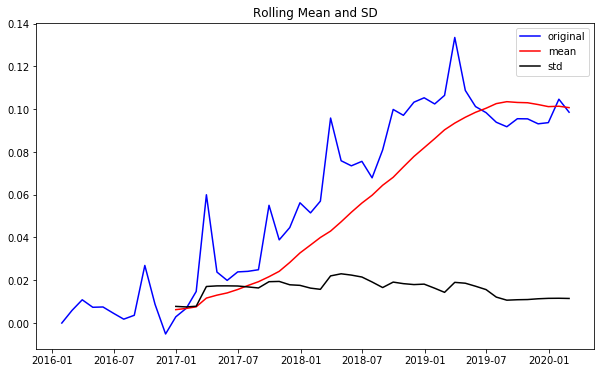

Test statistic             -1.191678
p-value                     0.677165
#Lags used                  6.000000
No of observations used    43.000000
Critical value(1%)         -3.592504
Critical value(5%)         -2.931550
Critical value(10%)        -2.604066
dtype: float64


In [11]:
# Exponencial decay weighted average
exponentailDecayWeightedAverage = indexed_dataset_logscale.ewm(halflife= 12, min_periods= 0, adjust= True ).mean()
indexed_dataset_logscale_EDWA= indexed_dataset_logscale - exponentailDecayWeightedAverage
test_stationary(indexed_dataset_logscale_EDWA)

#### p-value in the Moving average was better compared to Exponential Decay Weighted Average; So considering the moving average.


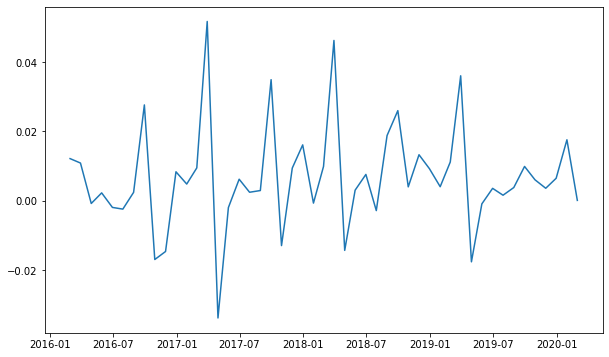

In [12]:
# Data Shifting to 1
data_log_shifting = indexed_dataset_logscale - indexed_dataset_logscale.shift()

plt.plot(data_log_shifting)

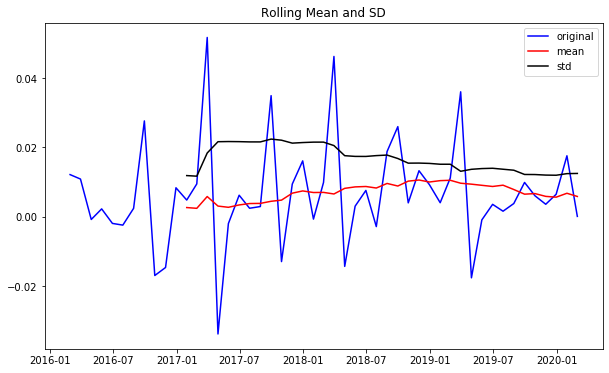

Test statistic             -2.086062
p-value                     0.250156
#Lags used                  5.000000
No of observations used    43.000000
Critical value(1%)         -3.592504
Critical value(5%)         -2.931550
Critical value(10%)        -2.604066
dtype: float64


In [13]:
data_log_shifting.dropna(inplace=True)
test_stationary(data_log_shifting)

#### Post shifting the data; mean and standard deviation looks stationary. So we are considering Integration(d) value as 1.

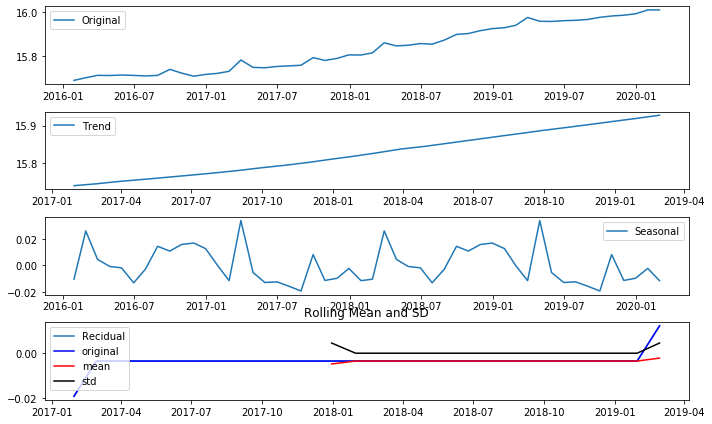

Test statistic             -4.600000
p-value                     0.000129
#Lags used                  0.000000
No of observations used    25.000000
Critical value(1%)         -3.723863
Critical value(5%)         -2.986489
Critical value(10%)        -2.632800
dtype: float64


In [44]:
decomposition = seasonal_decompose(indexed_dataset_logscale,period=25)

trend= decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(indexed_dataset_logscale, label= "Original" )
plt.legend(loc= "best")
plt.subplot(412)
plt.plot(trend, label= "Trend" )
plt.legend(loc= "best")
plt.subplot(413)
plt.plot(seasonal, label= "Seasonal" )
plt.legend(loc= "best")
plt.subplot(414)
plt.plot(residual, label= "Recidual" )
plt.legend(loc= "best")
plt.tight_layout()



decomposed_data= residual
decomposed_data.dropna(inplace= True)
 #Determinig roling stats
moving_average= decomposed_data.rolling(window=12 ).mean()
moving_std= decomposed_data.rolling(window=12 ).std()


original= plt.plot(decomposed_data, color= "blue", label= "original")
mean = plt.plot(moving_average, color= "red", label= "mean")
std = plt.plot(moving_std, color= "black", label= "std")
plt.legend(loc="best")
plt.title("Rolling Mean and SD")
plt.show(block=False)
#Dickey- fuller test

dftest= adfuller(decomposed_data, autolag="AIC")

dfoutput= pd.Series(dftest[0:4], index= ["Test statistic", "p-value", "#Lags used", "No of observations used"])
for key, value in dftest[4].items():
    dfoutput["Critical value(%s)" %key] = value


print(dfoutput)


### We can see our data has a increasing trend, with seasonality but the p-value of the residual is very low.

C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


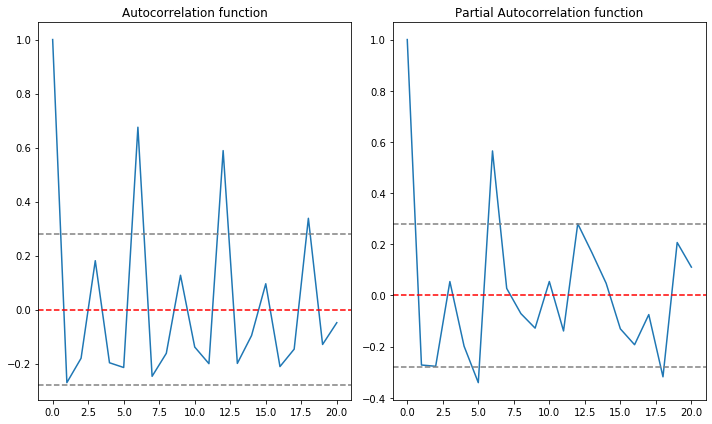

In [15]:
# Calculating Auto-correclation and Partial auto-correlation to find out the Moving Average(MA) and Autoregression (AR) values.

lag_acf = acf(data_log_shifting, nlags= 20)
lag_pacf = pacf(data_log_shifting, nlags= 20, method= "ols")

#ACF plot
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color= "red" )
plt.axhline(y=-1.96/np.sqrt(len(data_log_shifting)), linestyle="--", color= "grey" )
plt.axhline(y=1.96/np.sqrt(len(data_log_shifting)), linestyle="--", color= "grey" )
plt.title("Autocorrelation function")
        
#PACF plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color= "red" )
plt.axhline(y=-1.96/np.sqrt(len(data_log_shifting)), linestyle="--", color= "grey" )
plt.axhline(y=1.96/np.sqrt(len(data_log_shifting)), linestyle="--", color= "grey" )
plt.title("Partial Autocorrelation function")
            
plt.tight_layout()
            
            

#### By looking at the graphs; we can define the p value= 2 and q value= 2.

C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:849: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs / 2. * (log(2 * pi) + log(sigma2)) - ssr / (2 * sigma2)
No handles with labels found to put in legend.


plotting AR Model
                             ARIMA Model Results                              
Dep. Variable:               D.Credit   No. Observations:                   49
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 145.907
Method:                       css-mle   S.D. of innovations              0.012
Date:                Wed, 14 Oct 2020   AIC                           -279.814
Time:                        19:03:55   BIC                           -268.464
Sample:                             1   HQIC                          -275.508
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0066      0.002      4.129      0.000       0.003       0.010
ar.L1.D.Credit    -0.9292      0.039    -23.888      0.000      -1.005      -0.853
ar.L2.D.Credit    

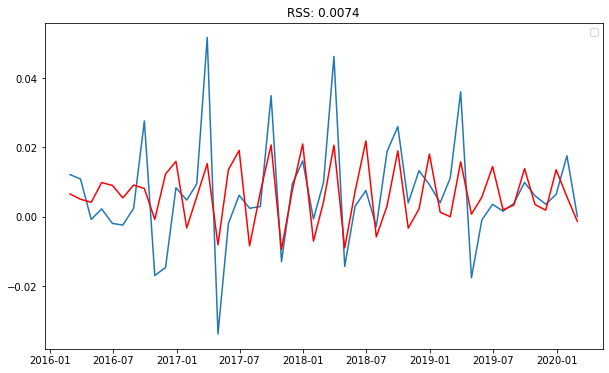

In [16]:
#ARIMA model by using the above defined parameters:
model= ARIMA(indexed_dataset_logscale, order=(2,1,2))
results_ar = model.fit(disp= 0,transparams=False)
plt.plot(data_log_shifting)
plt.plot(results_ar.fittedvalues, color = "red")
plt.legend(loc="best")
plt.title("RSS: %.4f" %sum(((results_ar.fittedvalues-data_log_shifting["Credit"])**2)))
print("plotting AR Model")
print(results_ar.summary())

### By Looking at the above graph, we can define the model has tight fit as the RSS(Residual Sum of Squares) value is 0.0074; which is very low.

In [17]:
# Results of the ARIMA model
prediction_ARIMA = pd.Series(results_ar.fittedvalues, copy= True)
prediction_ARIMA.head()

Month
2016-02-29    0.006598
2016-03-30    0.005084
2016-04-30    0.004205
2016-05-30    0.009877
2016-06-30    0.009055
dtype: float64

In [18]:
# Cumulative Sum of the model
prediction_ARIMA_cumsum= prediction_ARIMA.cumsum()
print(prediction_ARIMA_cumsum.head())

Month
2016-02-29    0.006598
2016-03-30    0.011682
2016-04-30    0.015887
2016-05-30    0.025764
2016-06-30    0.034819
dtype: float64


In [19]:
# Fitting the log transformed dataset in to the created estimator
prediction_ARIMA_log= pd.Series(indexed_dataset_logscale["Credit"], index=indexed_dataset_logscale.index)
prediction_ARIMA_log= prediction_ARIMA_log.add(prediction_ARIMA_cumsum, fill_value=0)
prediction_ARIMA_log.head()

Month
2016-01-30    15.687055
2016-02-29    15.705827
2016-03-30    15.721805
2016-04-30    15.725262
2016-05-30    15.737445
dtype: float64

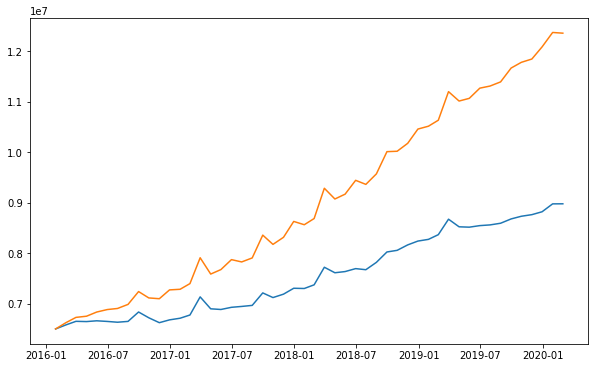

In [43]:
# Exponential conversion of the data
prediction_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexed_dataset)
plt.plot(prediction_ARIMA)

In [21]:
indexed_dataset_logscale.info()
# we have 50 data points and we need the prediction for next 6 months; So the prediction value will be taken as 56

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2016-01-30 to 2020-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Credit  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\anish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


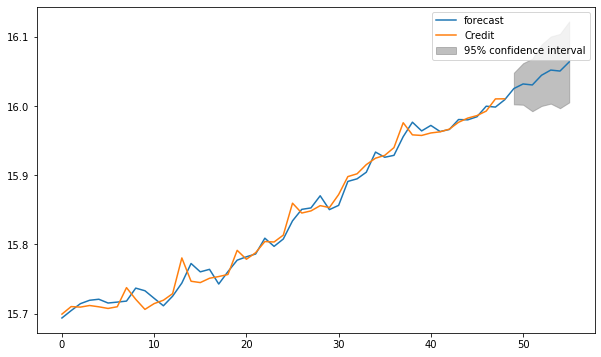

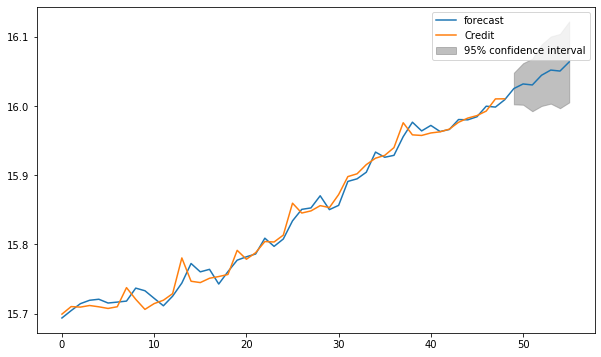

In [22]:
results_ar.plot_predict(1,56)

In [26]:
# Predicting the results for next 6 months
Pred_results= results_ar.forecast(steps=6)
Prediction =np.exp(Pred_results[0])
Prediction

array([9114426.86239889, 9174948.40678608, 9161831.79983789,
       9291348.44555461, 9361096.98805743, 9347595.01491785])

## Above are the predicted Credit amount from March 2020 to August 2020. 

In [27]:
# Uploading the actual values which was Credited from the bank
actual_dataset= pd.read_csv("E:\\Ani\\self\\Trinity\\NLP_assignment\\Credit for feb_aug-2020.csv")

In [28]:
Actual = np.array(actual_dataset["Credit"])
Actual
# Converting to numpy array

array([9263133, 9153122, 9108882, 9136004, 9148074, 9112035], dtype=int64)

In [29]:
# Calculating the difference between Actual Credit values and Predicted Credit values
Difference_Credit= Actual-Prediction

Text(0, 0.5, 'Rupees in crores')

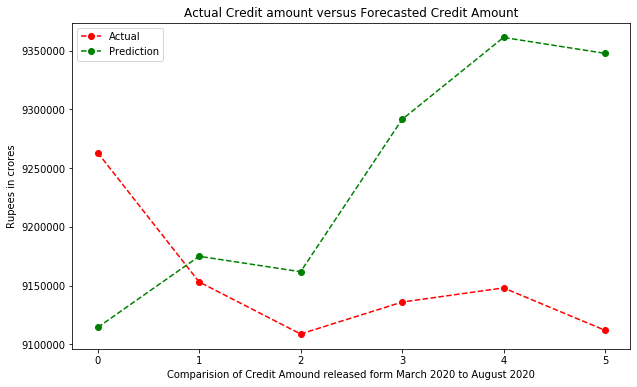

In [66]:
plt.plot(Actual, "bo--" , color= "red")
plt.plot(Prediction, "bo--" , color= "green")
plt.legend(("Actual", "Prediction"))
plt.title("Actual Credit amount versus Forecasted Credit Amount")
plt.xlabel ("Comparision of Credit Amound released form March 2020 to August 2020")
plt.ylabel("Rupees in crores")

In [55]:
plt.xlabel?

Text(0, 0.5, 'Rupees in crores')

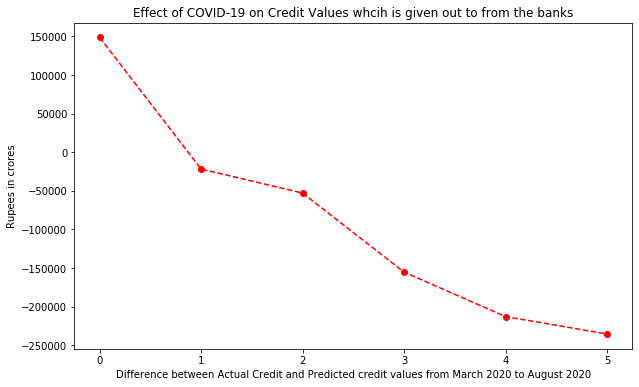

In [30]:
# Visualizing the difference
plt.plot(Difference_Credit,'bo--', color= "red")
plt.xlabel("Difference between Actual Credit and Predicted credit values from March 2020 to August 2020")
plt.title("Effect of COVID-19 on Credit Values which is given out to from the banks")
plt.ylabel("Rupees in crores")


# The difference in the Actual and Predicted values clearly shows that their was a huge downfall in releasing the credit amounts from the bank from March 2020

# Though there was seasonality trend in the data; there was no such sudden downfall from 2016. 

# This clearly shows that COVID-19 pandemic effect on the Credit amount which was released from the commercial banks for the development of the multiple sectors in India. 